C:\Users\CCL\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


NameError: name 'sobel' is not defined

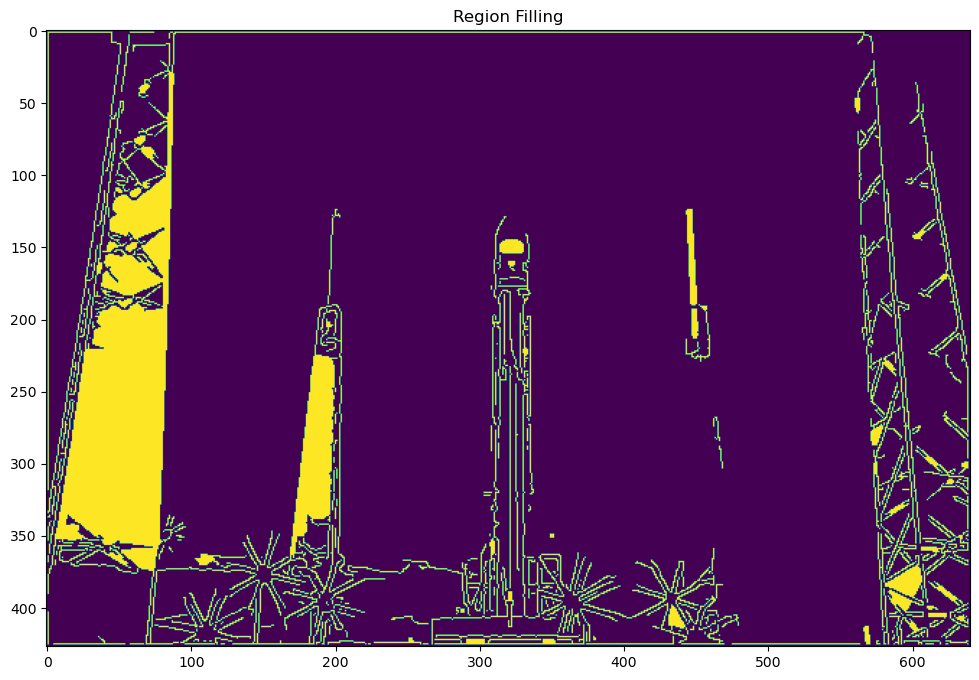

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from skimage.feature import canny

from skimage import data,morphology

from skimage.color import rgb2gray

import scipy.ndimage as nd

plt.rcParams["figure.figsize"] = (12,8)

%matplotlib inline
 
# load images and convert grayscale

rocket = data.rocket()

rocket_wh = rgb2gray(rocket)
 
# apply edge segmentation
# plot canny edge detection

edges = canny(rocket_wh)

plt.imshow(edges, interpolation='gaussian')

plt.title('Canny detector')
 
# fill regions to perform edge segmentation

fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)

plt.title('Region Filling')
 
# Region Segmentation
# First we print the elevation map

elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)
 
# Since, the contrast difference is not much. Anyways we will perform it

markers = np.zeros_like(rocket_wh)

markers[rocket_wh < 0.1171875] = 1 # 30/255

markers[rocket_wh > 0.5859375] = 2 # 150/255
 
plt.imshow(markers)

plt.title('markers')
 
# Perform watershed region segmentation 

segmentation = morphology.watershed(elevation_map, markers)
 
plt.imshow(segmentation)

plt.title('Watershed segmentation')
 
# plot overlays and contour

segmentation = nd.binary_fill_holes(segmentation - 1)

label_rock, _ = nd.label(segmentation)
# overlay image with different labels

image_label_overlay = label2rgb(label_rock, image=rocket_wh)
 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)

ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)
 

fig.subplots_adjust(**margins)

In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
#write a python program to read an image from graphics file
from PIL import Image

def extract_frames(gif_path, output_folder):
    try:
        gif = Image.open(gif_path)
        frames = []
        for i in range(gif.n_frames):
            gif.seek(i)
            frame = gif.copy()
            frames.append(frame)
            frame.save(f"{output_folder}/frame_{i}.png")  # Save each frame as PNG (or any desired format)
        print(f"{gif.n_frames} frames extracted successfully.")
    except Exception as e:
        print("Error:", e)

gif_path = "sun.gif"  
output_folder = "frames"  # Output folder to save the frames
extract_frames(gif_path, output_folder)


17 frames extracted successfully.


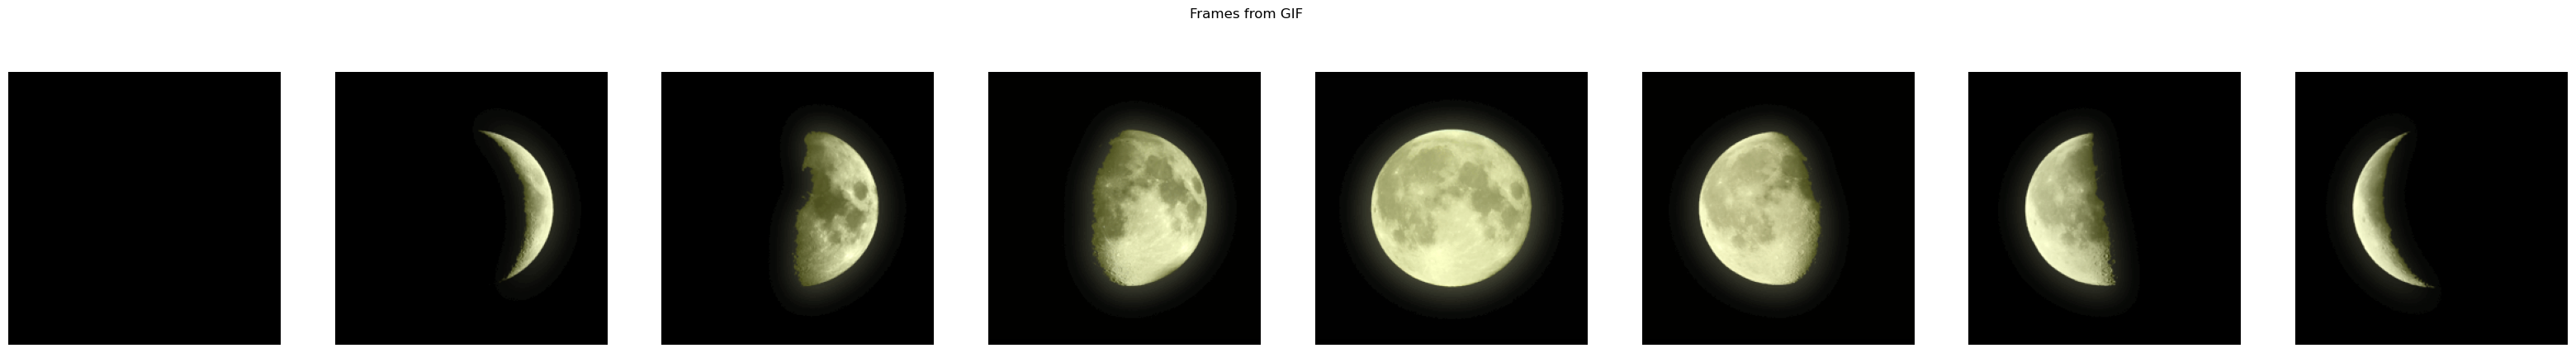

In [30]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

def extract_and_display_frames(gif_path):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Display each frame
    num_frames = len(gif)
    plt.figure(figsize=(5*num_frames, 5))  # Adjust the figure size as needed
    plt.suptitle('Frames from GIF')

    for i, frame in enumerate(gif):
        plt.subplot(1, num_frames, i + 1)  # Create subplot
        
        # Check the color mode of the frame
        if frame.ndim == 2:
            # Grayscale frame
            plt.imshow(frame, cmap='gray', extent=[0, 5, 0, 5])  # Display as grayscale
        else:
            # Color frame
            if frame.shape[2] == 4:
                # If alpha channel exists, remove it
                frame = frame[:, :, :3]
            plt.imshow(frame, extent=[0, 5, 0, 5])  # Display with original colors
        
        plt.axis('off')

    plt.show()

gif_path = "moon2.gif" 
extract_and_display_frames(gif_path)


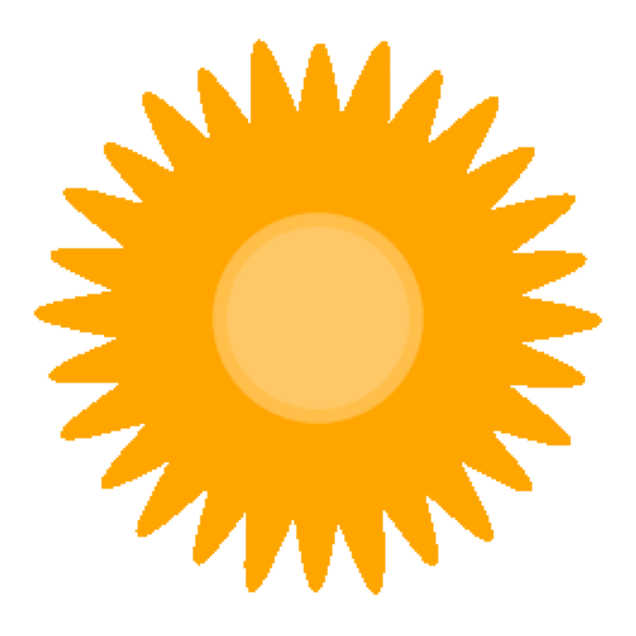

In [24]:
import imageio
import matplotlib.pyplot as plt
import cv2
def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)
    frame = gif.get_data(frame_index)
    gif_rgb = cv2.cvtColor( frame, cv2.COLOR_BGR2RGB)

    # Read the specific frame
    frame = gif.get_data(frame_index)

    # Display the frame
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

gif_path = "sun.gif"  # Replace with the path to your GIF file
frame_index = 1  # Index of the frame you want to display
display_frame(gif_path, frame_index)

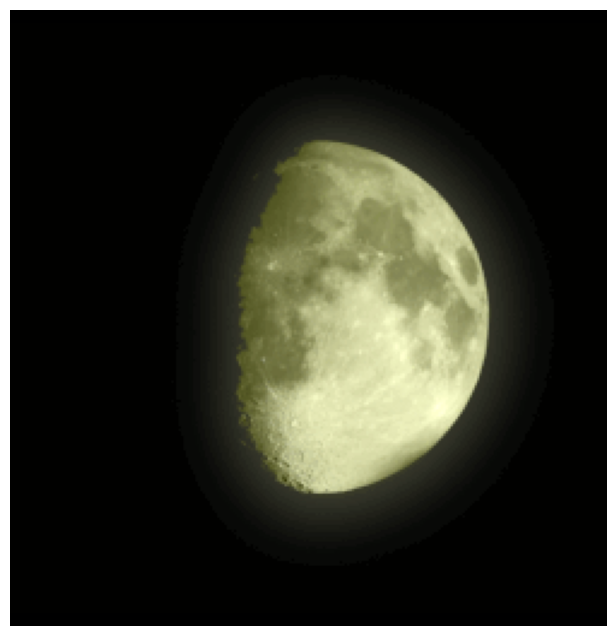

In [34]:
import imageio
import matplotlib.pyplot as plt
import cv2

#def bgr_to_rgb(image):
    # Convert BGR image to RGB format
    #return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Read the specific frame
    frame_bgr = gif.get_data(frame_index)

    # Convert BGR to RGB
    #frame_rgb = bgr_to_rgb(frame_bgr)

    # Display the frame
    plt.imshow(frame_bgr)
    plt.axis('off')
    plt.show()

gif_path = "moon2.gif"
frame_index = 3  # Index of the frame you want to display
display_frame(gif_path, frame_index)

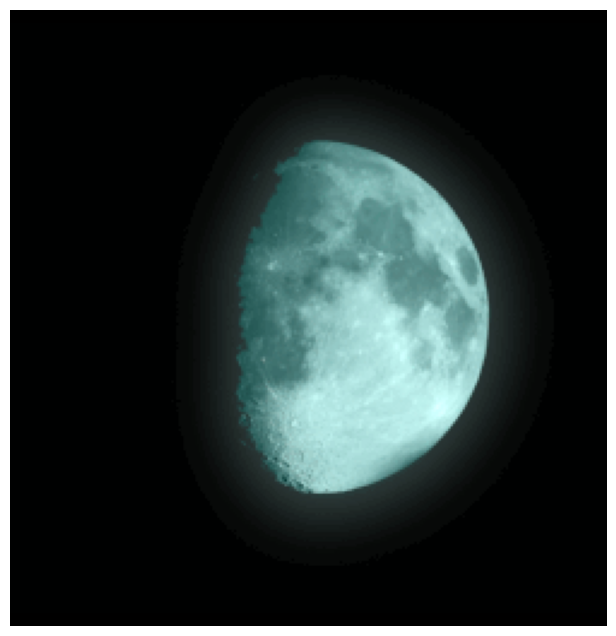

In [35]:
import imageio
import matplotlib.pyplot as plt
import cv2

def bgr_to_rgb(image):
    # Convert BGR image to RGB format
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_frame(gif_path, frame_index):
    # Read GIF file
    gif = imageio.get_reader(gif_path)

    # Read the specific frame
    frame_bgr = gif.get_data(frame_index)

    # Convert BGR to RGB
    frame_rgb = bgr_to_rgb(frame_bgr)

    # Display the frame
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

gif_path = "moon2.gif"
frame_index = 3  # Index of the frame you want to display
display_frame(gif_path, frame_index)

In [36]:
#write a program to convert binary image to indexed image and vice versa
import numpy as np

def binary_to_indexed(binary_image):
    # Create an indexed image array
    indexed_image = np.zeros_like(binary_image, dtype=np.uint8)
   
    # Assign index 0 to black pixels and index 1 to white pixels
    indexed_image[binary_image == 0] = 0
    indexed_image[binary_image == 255] = 1
   
    return indexed_image

def indexed_to_binary(indexed_image, threshold=0.5):
    # Create a binary image array
    binary_image = np.zeros_like(indexed_image, dtype=np.uint8)
   
    # Set pixels with index <= threshold to black (0), and > threshold to white (255)
    binary_image[indexed_image <= threshold] = 0
    binary_image[indexed_image > threshold] = 255
   
    return binary_image

# Example binary image (replace this with your own binary image)
binary_image = np.array([[0, 255, 0],
                         [255, 255, 255],
                         [0, 0, 0]], dtype=np.uint8)

# Convert binary image to indexed image
indexed_image = binary_to_indexed(binary_image)

# Convert indexed image to binary image
restored_binary_image = indexed_to_binary(indexed_image)

# Display the results
print("Original Binary Image:")
print(binary_image)
print("\nIndexed Image:")
print(indexed_image)
print("\nRestored Binary Image:")
print(restored_binary_image)


Original Binary Image:
[[  0 255   0]
 [255 255 255]
 [  0   0   0]]

Indexed Image:
[[0 1 0]
 [1 1 1]
 [0 0 0]]

Restored Binary Image:
[[  0 255   0]
 [255 255 255]
 [  0   0   0]]


In [7]:
#write a program to convert matrix to grayscale image
import cv2
import numpy as np

def matrix_to_grayscale_image(matrix):
    # Normalize the matrix values to the range [0, 255]
    normalized_matrix = cv2.normalize(matrix, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    # Create a grayscale image from the normalized matrix
    grayscale_image = cv2.cvtColor(normalized_matrix, cv2.COLOR_GRAY2BGR)
    
    return grayscale_image

# Example matrix
matrix = np.random.rand(256, 256) * 255  # Random matrix in the range [0, 255]

# Convert matrix to grayscale image
grayscale_image = matrix_to_grayscale_image(matrix)

# Display grayscale image
cv2.imshow('Grayscale Image', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [40]:
#write a program to convert an image to 8 - bit, 16 - bit unsigned integer
import cv2

def convert_to_8_bit(image):
    # Convert image to 8-bit unsigned integer
    image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return image_8bit

def convert_to_16_bit(image):
    # Convert image to 16-bit unsigned integer
    image_16bit = cv2.normalize(image, None, 0, 65535, cv2.NORM_MINMAX, dtype=cv2.CV_16U)
    return image_16bit

# Read an example image
image_path = 'cat.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to 8-bit
image_8bit = convert_to_8_bit(image)

# Convert image to 16-bit
image_16bit = convert_to_16_bit(image)

# Display the converted images
cv2.imshow('8-bit Image', image_8bit)
cv2.imshow('16-bit Image', image_16bit)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
#write a program to add noise to image
import cv2
import numpy as np

def add_gaussian_noise(image, mean=0, std_dev=25):
    # Generate Gaussian noise
    noise = np.random.normal(mean, std_dev, image.shape)
    
    # Add noise to image
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    
    return noisy_image

#def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    #noisy_image = np.copy(image)
    
    # Salt noise
    #salt_mask = np.random.rand(*image.shape) < salt_prob
    #noisy_image[salt_mask] = 255
    
    # Pepper noise
    #pepper_mask = np.random.rand(*image.shape) < pepper_prob
    #noisy_image[pepper_mask] = 0
    
    #return noisy_image

# Read an example image
image_path = 'cat.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not read the image.")
else:
    # Add Gaussian noise
    noisy_gaussian_image = add_gaussian_noise(image)
    
    # Add salt-and-pepper noise
    #noisy_salt_pepper_image = add_salt_and_pepper_noise(image)
    
    # Display the original and noisy images
    cv2.imshow('Original Image', image)
    cv2.imshow('Gaussian Noise', noisy_gaussian_image)
    #cv2.imshow('Salt-and-Pepper Noise', noisy_salt_pepper_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [9]:
import cv2
import numpy as np

def add_gaussian_noise(image, mean=0, std_dev=25):
    # Generate Gaussian noise
    noise = np.random.normal(mean, std_dev, image.shape)
    
    # Add noise to image
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    
    return noisy_image

def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    noisy_image = np.copy(image)
    
    # Salt noise
    salt_mask = np.random.rand(*image.shape) < salt_prob
    noisy_image[salt_mask] = 255
    
    # Pepper noise
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[pepper_mask] = 0
    
    return noisy_image

# Read an example image
image_path = 'dog.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not read the image.")
else:
    # Add Gaussian noise
    noisy_gaussian_image = add_gaussian_noise(image)
    
    # Add salt-and-pepper noise
    noisy_salt_pepper_image = add_salt_and_pepper_noise(image)
    
    # Display the original and noisy images
    cv2.imshow('Original Image', image)
    cv2.imshow('Gaussian Noise', noisy_gaussian_image)
    cv2.imshow('Salt-and-Pepper Noise', noisy_salt_pepper_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [6]:
#convert image to grayscale image without using built in function
import cv2
import numpy as np

# Read the image
img = cv2.imread('cat1.jpg')

# Check if the image was successfully loaded
if img is None:
    print("Error: Could not read the image.")
else:
    # Get the dimensions of the image
    height, width, _ = img.shape
    
    # Create an empty grayscale image
    gray_image = np.zeros((height, width), dtype=np.uint8)
    
    # Convert each pixel to grayscale by averaging RGB values
    for i in range(height):
        for j in range(width):
            gray_image[i, j] = np.mean(img[i, j])
    
    # Display the original and grayscale images
    cv2.imshow('Original Image', img)
    cv2.imshow('Grayscale Image', gray_image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()


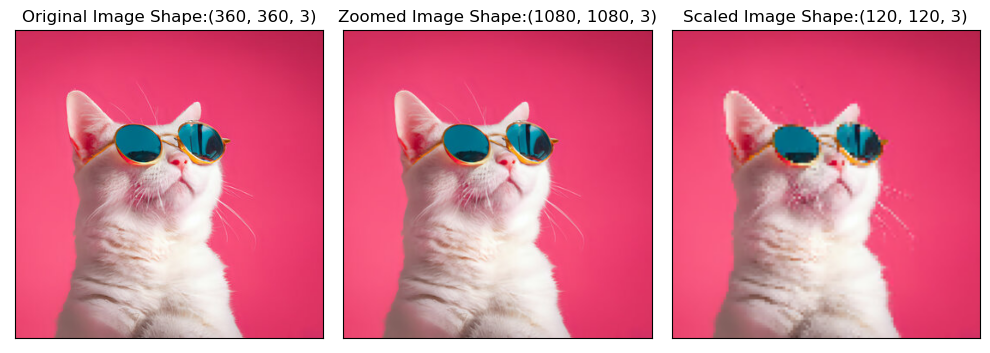

In [53]:
#image resize without using built in function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, scale_factor):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    new_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the corresponding pixel in the original image
            orig_i = int(i / scale_factor)
            orig_j = int(j / scale_factor)
            
            if orig_i < height and orig_j < width:
                new_image[i, j] = image[orig_i, orig_j]
    
    return new_image

# Read the image
image = cv2.imread('cat1.jpg')

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define scale factors
scale_factor_1 = 3.0
scale_factor_2 = 1 / 3.0

# Resize the image
zoomed_image = resize_image(image_rgb, scale_factor_1)
scaled_image = resize_image(image_rgb, scale_factor_2)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:' + str(image_rgb.shape))
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:' + str(zoomed_image.shape))
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:' + str(scaled_image.shape))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()



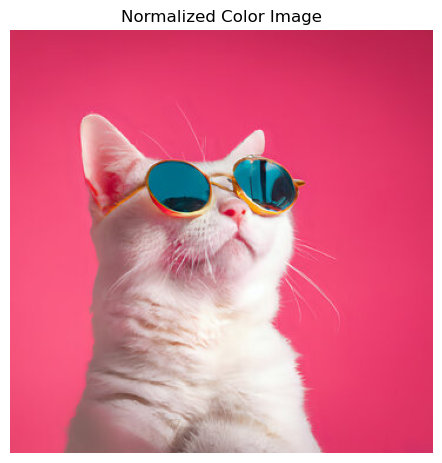

In [75]:
#image normalization without using built in function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_normalize(image, min_value, max_value):
    # Find the minimum and maximum values in the image
    image_min = np.min(image)
    image_max = np.max(image)
    
    # Normalize the image using the given min and max values
    normalized_image = (image - image_min) * ((max_value - min_value) / (image_max - image_min)) + min_value
    
    return normalized_image

# Read the image
image = cv2.imread('cat1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Normalize the color image
    normalized_image = np.zeros_like(image_rgb, dtype=np.float32)
    for channel in range(3):  # Loop through each color channel (R, G, B)
        normalized_image[:,:,channel] = manual_normalize(image_rgb[:,:,channel].astype('float32'), 0, 255)
    
    normalized_image = normalized_image.astype('uint8')
    
    # Display the original and normalized color images
    plt.figure(figsize=(12, 6))
    
    #plt.subplot(1, 2, 1)
    #plt.imshow(image_rgb)
    #plt.title('Original Color Image')
    #plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(normalized_image)
    plt.title('Normalized Color Image')
    plt.axis('off')
    
    plt.show()


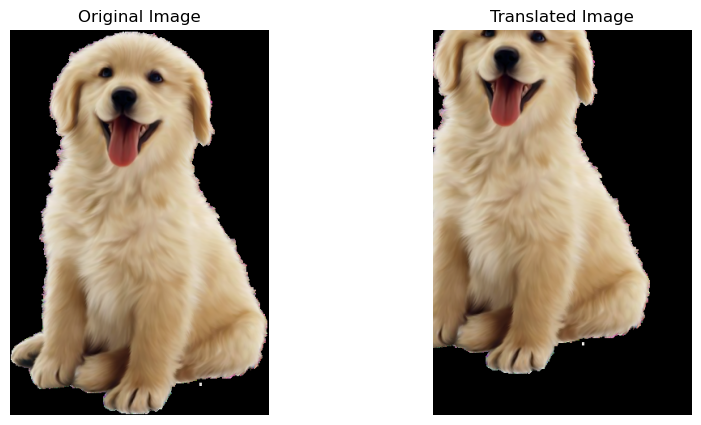

In [2]:
#image translation without using built in function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def translate_image(image, shift_x, shift_y):
    rows, cols, channels = image.shape
    
    # Create an empty image with the same size as the original image
    translated_image = np.zeros_like(image)
    
    # Loop through each pixel in the original image
    for i in range(rows):
        for j in range(cols):
            # Calculate the new position for the pixel after translation
            new_i = i - shift_y
            new_j = j - shift_x
            
            # Check if the new position is within the image boundaries
            if 0 <= new_i < rows and 0 <= new_j < cols:
                translated_image[new_i, new_j] = image[i, j]
                
    return translated_image

# Read the image
image = cv2.imread('puppy.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Translate the image
    translated_image = translate_image(image, 50, 50)  # Shift by 50 pixels in both x and y directions
    
    # Display the original and translated images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
    plt.title('Translated Image')
    plt.axis('off')
    
    plt.show()


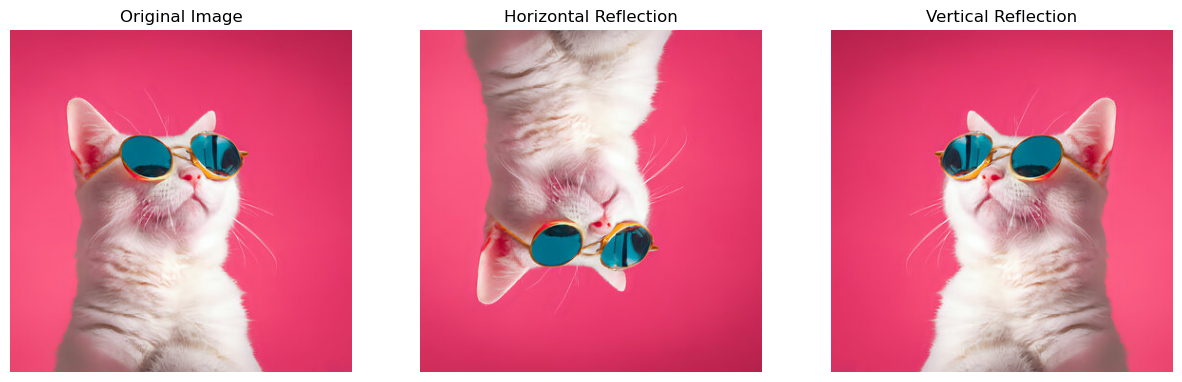

In [4]:
#Image Reflection without using built in function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reflect_image(image, axis):
    rows, cols, channels = image.shape
    
    # Create an empty image with the same size as the original image
    reflected_image = np.zeros_like(image)
    
    if axis == 'horizontal':
        # Reflect along the horizontal axis
        for i in range(rows):
            reflected_image[i, :] = image[rows - 1 - i, :]
    elif axis == 'vertical':
        # Reflect along the vertical axis
        for j in range(cols):
            reflected_image[:, j] = image[:, cols - 1 - j]
    
    return reflected_image

# Read the image
image = cv2.imread('cat1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Reflect the image
    reflected_image_horizontal = reflect_image(image, 'horizontal')
    reflected_image_vertical = reflect_image(image, 'vertical')
    
    # Display the original and reflected images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(reflected_image_horizontal, cv2.COLOR_BGR2RGB))
    plt.title('Horizontal Reflection')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(reflected_image_vertical, cv2.COLOR_BGR2RGB))
    plt.title('Vertical Reflection')
    plt.axis('off')
    
    plt.show()


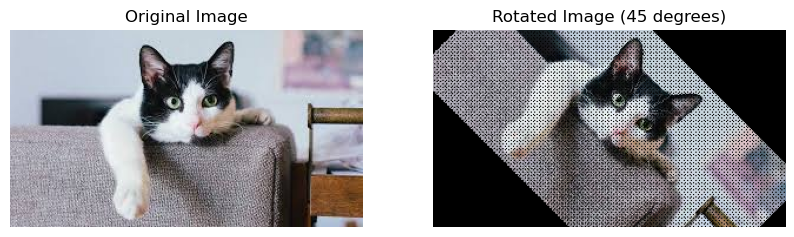

In [68]:
#Image Rotation without using built in function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    # Convert angle from degrees to radians
    theta = np.radians(angle)
    
    # Get image dimensions
    rows, cols, _ = image.shape
    
    # Calculate the center of the image
    center_x = cols / 2
    center_y = rows / 2
    
    # Create an empty image with the same size as the original image
    rotated_image = np.zeros_like(image)
    
    # Loop through each pixel in the original image
    for i in range(rows):
        for j in range(cols):
            # Translate the pixel coordinates to the origin
            x = j - center_x
            y = i - center_y
            
            # Apply rotation matrix
            new_x = x * np.cos(theta) - y * np.sin(theta)
            new_y = x * np.sin(theta) + y * np.cos(theta)
            
            # Translate the rotated coordinates back to the original position
            new_i = int(new_y + center_y)
            new_j = int(new_x + center_x)
            
            # Check if the new coordinates are within the image boundaries
            if 0 <= new_i < rows and 0 <= new_j < cols:
                rotated_image[new_i, new_j] = image[i, j]
    
    return rotated_image

# Read the image
image = cv2.imread('cat.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Rotate the image by 45 degrees
    rotated_image = rotate_image(image, 45)
    
    # Display the original and rotated images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image (45 degrees)')
    plt.axis('off')
    
    plt.show()


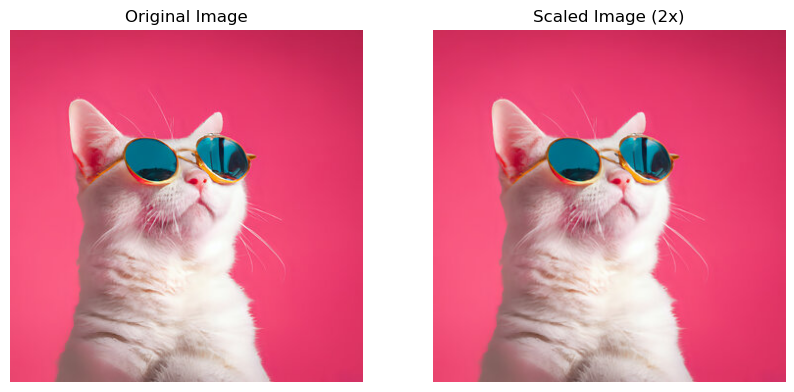

In [12]:
#Image Scaling without using built in function
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_image(image, scale_factor):
    # Get image dimensions
    rows, cols, _ = image.shape
    
    # Calculate new dimensions
    new_rows = int(rows * scale_factor)
    new_cols = int(cols * scale_factor)
    
    # Create an empty image with the new dimensions
    scaled_image = np.zeros((new_rows, new_cols, 3), dtype=np.uint8)
    
    # Loop through each pixel in the scaled image
    for i in range(new_rows):
        for j in range(new_cols):
            # Calculate corresponding pixel in the original image
            orig_i = int(i / scale_factor)
            orig_j = int(j / scale_factor)
            
            # Check if the original coordinates are within the image boundaries
            if 0 <= orig_i < rows and 0 <= orig_j < cols:
                scaled_image[i, j] = image[orig_i, orig_j]
    
    return scaled_image

# Read the image
image = cv2.imread('cat1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Scale the image by a factor of 2
    scaled_image = scale_image(image, 2)
    
    # Display the original and scaled images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
    plt.title('Scaled Image (2x)')
    plt.axis('off')
    
    plt.show()


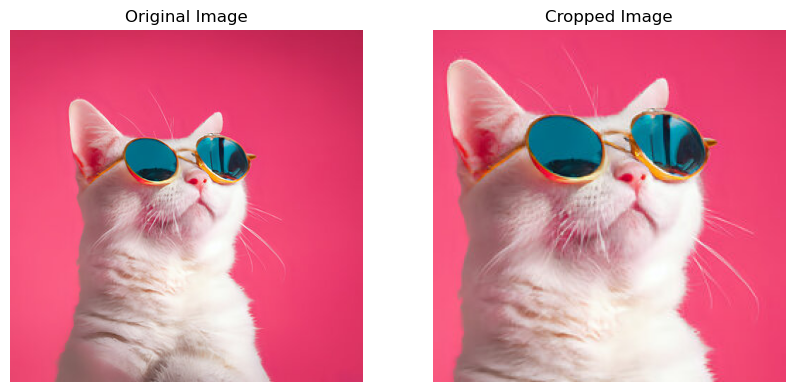

In [76]:
#IMAGE CROP without using builot in function
import cv2
import matplotlib.pyplot as plt

def crop_image(image, start_x, start_y, end_x, end_y):
    # Crop the image using the specified coordinates
    cropped_image = image[start_y:end_y, start_x:end_x]
    
    return cropped_image

# Read the image
image = cv2.imread('cat1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Define the coordinates for cropping (x1, y1, x2, y2)
    start_x, start_y = 50, 50
    end_x, end_y = 300, 300
    
    # Perform cropping
    cropped_image = crop_image(image, start_x, start_y, end_x, end_y)
    
    # Display the original and cropped images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Image')
    plt.axis('off')
    
    plt.show()


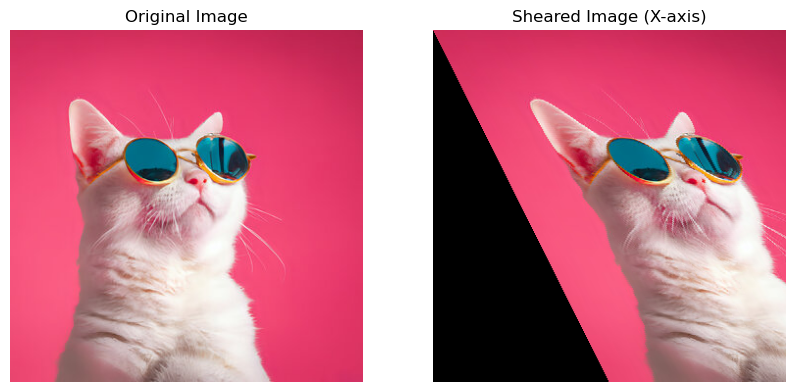

In [77]:
#image shearing X-axis
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_x(image, shear_factor):
    rows, cols, channels = image.shape
    
    # Create an empty image with the same size as the original image
    sheared_image = np.zeros_like(image)
    
    # Loop through each pixel in the original image
    for i in range(rows):
        for j in range(cols):
            # Calculate the new x-coordinate after shearing
            new_j = int(j + shear_factor * i)
            
            # Check if the new x-coordinate is within the image boundaries
            if 0 <= new_j < cols:
                sheared_image[i, new_j] = image[i, j]
    
    return sheared_image

# Read the image
image = cv2.imread('cat1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Shear the image in the X-axis by a factor of 0.5
    sheared_image = shear_x(image, 0.5)
    
    # Display the original and sheared images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
    plt.title('Sheared Image (X-axis)')
    plt.axis('off')
    
    plt.show()


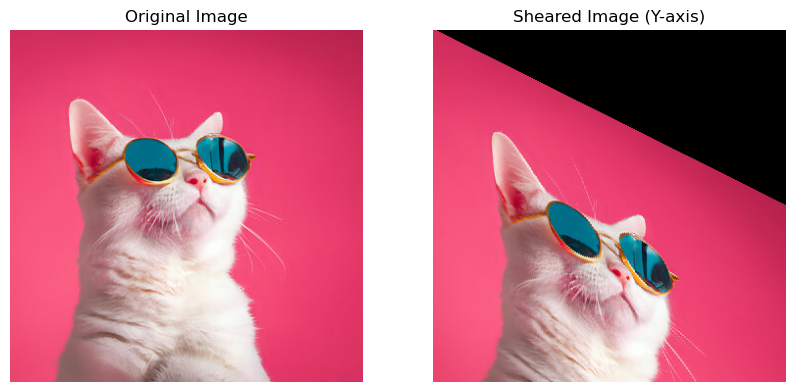

In [78]:
#image shearing Y-axis
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_y(image, shear_factor):
    rows, cols, channels = image.shape
    
    # Create an empty image with the same size as the original image
    sheared_image = np.zeros_like(image)
    
    # Loop through each pixel in the original image
    for i in range(rows):
        for j in range(cols):
            # Calculate the new y-coordinate after shearing
            new_i = int(i + shear_factor * j)
            
            # Check if the new y-coordinate is within the image boundaries
            if 0 <= new_i < rows:
                sheared_image[new_i, j] = image[i, j]
    
    return sheared_image

# Read the image
image = cv2.imread('cat1.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Shear the image in the Y-axis by a factor of 0.5
    sheared_image = shear_y(image, 0.5)
    
    # Display the original and sheared images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
    plt.title('Sheared Image (Y-axis)')
    plt.axis('off')
    
    plt.show()
